###Μηχανική Μάθηση 
####1η ατομική εργασία 
ΣΗΜΜΥ- ΕΜΠ - 7ο εξάμηνο -Ακ. Έτος 2022-23



# ⚠️
`Επισημαίνεται ότι απαγορεύεται η ανάρτηση των λύσεων των εργαστηριακών ασκήσεων στο github, ή σε άλλες ιστοσελίδες. Η σχεδίαση και το περιεχόμενο των εργαστηριακών projects αποτελούν αντικείμενο πνευματικής ιδιοκτησίας της διδακτικής ομάδας του μαθήματος.`

 `⚠️  Το σύνολο δεδομένων που σας δόθηκε δεν πρέπει να εμπλουτισθεί με οποιοδήποτε τρόπο. Η εργασία στην οποία θα χρησιμοποιηθεί εμπλουτισμένο σύνολο δεδομένων, δεν θα διορθωθεί.`

Ονοματεπώνυμο φοιτητή: Οδυσσεύς Δρυς-Πεντζάκης

Α.Μ.: 03119192

### 1. Εισαγωγή συνόλου δεδομένων

Tο σύνολο δεδομένων για το training-validation μπορείτε να το κατεβάσετε από [εδώ](https://drive.google.com/file/d/1-L7QQEfLWCsqiBClxUlg4yzquf1G_Ga-/view?usp=sharing) και για το testing από [εδώ](https://drive.google.com/file/d/1-6l-NL3wwKGKJpVjxjUrOdFbcnKo-PwW/view?usp=sharing).



1.α. Φορτώστε το σύνολο δεδομένων "train-val.csv"  στο notebook σας.

In [3]:
import pandas as pd
train = pd.read_csv(r'train-val.csv')


1.β. Φορτώστε το σύνολο δεδομένων "test.csv" στο notebook σας

In [4]:
import pandas as pd
test = pd.read_csv(r'test.csv')



### 2. Διερευνητική ανάλυση δεδομένων -Exploratory Data Analysis (EDA) 
Χρησιμοποιήστε code cells  με τις κατάλληλες τεχνικές EDA για την κατανόηση του συνόλου δεδομένων και text cells για επεξήγηση των αποτελεσμάτων. 

Χρησιμοποιώντας τις κατάλληλες μεθόδους παρουσιάστε με χρήση κώδικα πληροφορίες για τα εξής:

2α. το πλήθος των δειγμάτων και των χαρακτηριστικών του συνόλου δεδομένων, 

2β. το είδος των χαρακτηριστικών του συνόλου δεδομένων,  

2γ. τις ετικέτες των χαρακτηριστικών,

2δ. το πλήθος των κατηγοριών, 

2ε. πόσα δείγματα ανήκουν σε κάθε κατηγορία,

2στ. τη συσχέτιση μεταξύ των δεδομένων,

2ζ. οποιαδήποτε άλλη πληροφορία πιστεύετε ότι είναι χρήσιμη για την κατανόηση του συνόλου δεδομένων.

2α.  Είναι αναμενόμενο το test να έχει λιγότερες στήλες από το train, αφού λείπει η στήλη που θέλουμε να προβλέψει το μοντέλο μας.

In [3]:
#2a

print(test.shape)
print(train.shape)


(9679, 23)
(48423, 24)


2β. Βλέπουμε τους τύπους δεδομένων που έχει κάθε στήλη

In [4]:
#2b
print (train.dtypes)

id                 int64
Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday        float64
RainTomorrow     float64
dtype: object


2γ. Οι ετικέτες του train.

In [5]:
#2c
for col in train.columns:
    print(col)

id
Date
Location
MinTemp
MaxTemp
Rainfall
Evaporation
Sunshine
WindGustDir
WindGustSpeed
WindDir9am
WindDir3pm
WindSpeed9am
WindSpeed3pm
Humidity9am
Humidity3pm
Pressure9am
Pressure3pm
Cloud9am
Cloud3pm
Temp9am
Temp3pm
RainToday
RainTomorrow


In [ ]:
2δ. Αφαιρώντας τις τιμές που εμφανίζονται παραπάνω από μια φορά βρίσκουμε το σύνολο μοναδικών τιμών που είναι 2.

In [6]:
#2δ. το πλήθος των κατηγοριών
len(train.drop_duplicates(subset=['RainTomorrow']))
    


2

2ε. Διατρέχοντας τις τιμές της στήλης RainTomorrow μετράμε το πλήθος των ημερών που υπολογίζεται πως θα βρέξει αύριο.

In [7]:
#2ε. πόσα δείγματα ανήκουν σε κάθε κατηγορία
forecast= train.RainTomorrow
rain=0
nrain=0
for val in forecast:
    if val==0.0:
        nrain=nrain+1
    else:
        rain=rain+1
print ("RAINY DAYS:", rain)
print ("NOT RAINY DAYS:", nrain)
        
    


RAINY DAYS: 11059
NOT RAINY DAYS: 37364


2στ. Βρίσκουμε την συσχέτιση μεταξύ των δεδομένων.

In [8]:
#2στ. τη συσχέτιση μεταξύ των δεδομένων
train.corr()

C:\Users\odydr\AppData\Local\Temp\ipykernel_15956\1986677268.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train.corr()


,id,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
id,1.000000,0.104771,0.136331,-0.024047,0.096221,0.078911,0.047488,0.062482,0.040819,-0.129400,-0.085483,-0.104157,-0.108251,-0.073085,-0.066481,0.139226,0.120342,-0.003840,-0.002691
MinTemp,0.104771,1.000000,0.715692,0.096510,0.457483,0.053477,0.163349,0.193476,0.183079,-0.232420,0.021193,-0.372295,-0.385832,0.071455,0.006876,0.892621,0.682041,0.065077,0.084001
MaxTemp,0.136331,0.715692,1.000000,-0.103864,0.586798,0.469859,0.013580,0.003229,0.054409,-0.485241,-0.504320,-0.224734,-0.331614,-0.304386,-0.305659,0.881130,0.984609,-0.247060,-0.177480
Rainfall,-0.024047,0.096510,-0.103864,1.000000,-0.069284,-0.210261,0.160382,0.102262,0.068231,0.217506,0.258283,-0.178761,-0.125762,0.202290,0.162473,-0.007844,-0.108617,0.527639,0.244867
Evaporation,0.096221,0.457483,0.586798,-0.069284,1.000000,0.351482,0.194751,0.208774,0.154487,-0.521304,-0.392778,-0.226294,-0.261228,-0.188185,-0.193911,0.556079,0.569842,-0.191368,-0.122146
Sunshine,0.078911,0.053477,0.469859,-0.210261,0.351482,1.000000,-0.051283,-0.001514,0.055941,-0.471021,-0.634892,0.078309,0.010106,-0.693561,-0.708928,0.286368,0.492766,-0.314345,-0.437883
WindGustSpeed,0.047488,0.163349,0.013580,0.160382,0.194751,-0.051283,1.000000,0.633542,0.715518,-0.214060,0.004057,-0.485376,-0.434426,0.086327,0.125622,0.123985,-0.024427,0.188300,0.258618
WindSpeed9am,0.062482,0.193476,0.003229,0.102262,0.208774,-0.001514,0.633542,1.000000,0.541097,-0.289202,-0.019900,-0.266217,-0.212422,0.035081,0.066148,0.141875,-0.008063,0.121898,0.118477
WindSpeed3pm,0.040819,0.183079,0.054409,0.068231,0.154487,0.055941,0.715518,0.541097,1.000000,-0.166434,-0.003281,-0.327326,-0.289712,0.048956,0.032267,0.169477,0.030884,0.097368,0.109116
Humidity9am,-0.129400,-0.232420,-0.485241,0.217506,-0.521304,-0.471021,-0.214060,-0.289202,-0.166434,1.000000,0.644709,0.117477,0.167571,0.439629,0.349397,-0.472335,-0.478217,0.332583,0.244048


### 3. Προεπεξεργασία συνόλου δεδομένων
💡`Χρησιμοποιήστε το Column Transformer για τη δημιουργία και την εφαρμογή χωριστών μετασχηματιστών για αριθμητικά και κατηγορικά δεδομένα.`




In [5]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest,chi2

Χωρίζουμε τα δεδομένα μας σε κατηγορικά και νουμερικά.

In [6]:
numeric_features = ['RainToday','Temp3pm','Temp9am','Cloud3pm','Cloud9am','Pressure3pm',
                   'Pressure9am','Humidity3pm','Humidity9am','WindSpeed3pm','WindSpeed9am','WindGustSpeed',
                   'Sunshine','Evaporation','Rainfall','MaxTemp','MinTemp',]
categorical_features = ['WindGustDir','WindDir9am','WindDir3pm','Location']


3.α.  Θα χρησιμοποιήσετε όλα τα χαρακτηριστικά του συνόλου δεδομένων για την εκπαίδευση των ταξινομητών ή θα επιλέξετε κάποια από αυτά;  Θα κάνετε κάποια συνένωση κάποιων χαρακτηριστικών για δημιουργία νέων χαρακτηριστικών για το μοντέλο σας; 


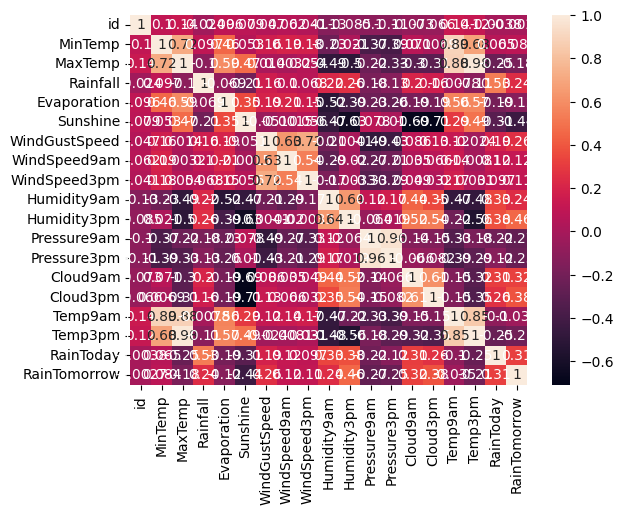

In [7]:
%matplotlib inline
import pandas as pd
corr=train.corr()
import seaborn as sns
sns.heatmap(corr, annot = True)
train.drop(['id','Date'], axis=1, inplace=True)


Παρατηρούμε πως το id και το Date δεν μας χρησιμεύουν πολύ, για αυτό και τα βγάζουμε.

3.β. Υπάρχουν απουσιάζουσες τιμές; Γράψτε κατάλληλο κώδικα ώστε να χειριστείτε αυτές τις τιμές.

 Βλέπουμε πως υπάρχουν απουσιάζουσες τιμές.
 Θα χρησιμοποιήσουμε το SimpleImputer για να τις γεμίσουμε, στα νουμερικά δεδομένα χωρίς τιμή θα βάλουμε τον μέσο όρο της στήλης στην οποία βρίσκεται και στα κατηγορικά δεδομένα θα βάλουμε την πιο συχνή απάντηση.

In [8]:
train.isnull().sum()

Location             0
MinTemp            160
MaxTemp            101
Rainfall             0
Evaporation      20384
Sunshine         22997
WindGustDir       3121
WindGustSpeed     3093
WindDir9am        3821
WindDir3pm        1328
WindSpeed9am       357
WindSpeed3pm       857
Humidity9am        558
Humidity3pm       1259
Pressure9am       4780
Pressure3pm       4789
Cloud9am         17890
Cloud3pm         18981
Temp9am            226
Temp3pm            913
RainToday            0
RainTomorrow         0
dtype: int64

3.γ. Γράψτε κώδικα για την κατάλληλη μετατροπή των κατηγορικών μεταβλητών ώστε να μπορούν να τους διαχειριστούν οι ταξινομητές που θα χρησιμοποιήσετε.

Θα χρησιμοποιήσουμε το OneHotEncoder για την κατάλληλη μετατροπή των κατηγορικών μεταβλητών.

In [8]:
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('scaler', OneHotEncoder(sparse=False, handle_unknown='ignore'))])

3.δ. Γράψτε κώδικα για την κλιμάκωση των χαρακτηριστικών, αν την θεωρείτε απαραίτητη

Θα χρησιμοποιήσουμε το StandardScaler για την κατάλληλη κλιμάκωση των νουμερικών μεταβλητών.

In [9]:
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())])

3.ε. Εκτελέστε όλα τα προηγούμενα βήμα προεκπαίδευσης (χρήση μετασχηματιστών) ώστε να είναι "καθαρό" το αρχικό σύνολο για να χρησιμοποιηθεί για την εκπαίδευση των ταξινομητών.

Σε ColumnTransformer βάζουμε τους transformers που ανάλογα την στήλη στην οποία βρiσκόμαστε μετατρέπουν κατάλληλα τα δεδομένα.

In [10]:

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])


3.στ. Αφού έχετε "καθαρίσει" το αρχικό σύνολο εκπαίδευσης, γράψτε τον κατάλληλο κώδικα ώστε από το αρχικό σύνολο εκπαίδευσης να δημιουργήσετε τα σύνολα Χ και y.

💡 `Η στήλη 'RainTomorrow' είναι η τιμή που θέλουμε να προβλέψει ο ταξινομητής μας.` 



In [11]:
X= train.drop(['RainTomorrow'], axis=1)
y=train['RainTomorrow']
X=preprocessor.fit_transform(X)


Αφου διαχωρίσουμε το train σε Χ και y κάνουμε fit_transform το Χ με τον preprocessor που φτιάξαμε

3.ζ. Διαχωρίστε το σύνολο δεδομένων σε σύνολο εκπαίδευσης (train set) και σε σύνολο επικύρωσης (validation set) (ο διαχωρισμός να είναι train set 70% και validation set 30%).


In [12]:
from sklearn.model_selection import train_test_split
 
RAND_STATE = 42
  # Split into training and testing 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=RAND_STATE)


In [18]:
X_train.shape

(33896, 114)

### 4. Εκπαίδευση μοντέλου με default τιμές στις παραμέτρους των ταξινομητών

Θα εκπαιδεύσουμε τους ακόλουθους ταξινομητές με το σύνολο εκπαίδευσης των δεδομένων μας: 
1. Naive Bayes
2. KNeighborsClassifier
3. LogisticRegression
4. MLP με ένα κρυφό επίπεδο
5. SVC
6. Decision Tree
7. Random Forest


In [13]:

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier




 4.α. Εκπαιδεύστε (fit)  και τους  7 ταξινομητές που προαναφέρθηκαν (εμφανίστε τα δείγματα από το train set μαζί με την ετικέτα τους στην είσοδο του κάθε ταξινομητή), χρησιμοποιώντας τις default τιμές για όλες τις παραμέτρους τους.

Κάνουμε fit με τους 7 ταξινομητές τον πίνακα X και τυπώνουμε το Model Score κάθε ταξινομητή.

In [20]:
# Define the classifier


classifierKnn = KNeighborsClassifier()
classifierNB=GaussianNB()
classifierLogReg=LogisticRegression()
classifierMLP=MLPClassifier()
classifierSVC=SVC()
classifierDTree=DecisionTreeClassifier()
classifierRanFor=RandomForestClassifier()


classifierKnn.fit(X_train, y_train)
 
# Predict
y_predKnn = classifierKnn.predict(X_test)
 
# Evaluate
print('Model score: {model.score(X_test, y_test)}')
 
from sklearn.metrics import classification_report 
# compute the classification report
print(classification_report(y_test, y_predKnn))



 


Model score: {model.score(X_test, y_test)}
              precision    recall  f1-score   support

         0.0       0.86      0.93      0.90     11184
         1.0       0.68      0.51      0.58      3343

    accuracy                           0.83     14527
   macro avg       0.77      0.72      0.74     14527
weighted avg       0.82      0.83      0.82     14527



In [21]:

# Fit the pipeline
classifierNB.fit(X_train, y_train)
 
# Predict
y_predNB = classifierNB.predict(X_test)
 
# Evaluate
print('Model score: {model.score(X_test, y_test)}')
 
from sklearn.metrics import classification_report 
# compute the classification report
print(classification_report(y_test, y_predNB))


Model score: {model.score(X_test, y_test)}
              precision    recall  f1-score   support

         0.0       0.88      0.61      0.72     11184
         1.0       0.36      0.71      0.47      3343

    accuracy                           0.64     14527
   macro avg       0.62      0.66      0.60     14527
weighted avg       0.76      0.64      0.67     14527



In [22]:

# Fit the pipeline
classifierLogReg.fit(X_train, y_train)
 
# Predict
y_predLogReg = classifierLogReg.predict(X_test)
 
# Evaluate
print('Model score: {model.score(X_test, y_test)}')
 
from sklearn.metrics import classification_report 
# compute the classification report
print(classification_report(y_test, y_predLogReg))

Model score: {model.score(X_test, y_test)}
              precision    recall  f1-score   support

         0.0       0.87      0.95      0.91     11184
         1.0       0.75      0.54      0.63      3343

    accuracy                           0.85     14527
   macro avg       0.81      0.74      0.77     14527
weighted avg       0.84      0.85      0.84     14527



C:\Users\odydr\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [23]:


# Fit the pipeline
classifierMLP.fit(X_train, y_train)
 
# Predict
y_predMLP = classifierMLP.predict(X_test)
 
# Evaluate
print('Model score: {model.score(X_test, y_test)}')
 
from sklearn.metrics import classification_report 
# compute the classification report
print(classification_report(y_test, y_predMLP))

Model score: {model.score(X_test, y_test)}
              precision    recall  f1-score   support

         0.0       0.89      0.88      0.89     11184
         1.0       0.62      0.64      0.63      3343

    accuracy                           0.83     14527
   macro avg       0.76      0.76      0.76     14527
weighted avg       0.83      0.83      0.83     14527



C:\Users\odydr\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [25]:

# Fit the pipeline
classifierSVC.fit(X_train, y_train)
 
# Predict
y_predSVC = classifierSVC.predict(X_test)
 
# Evaluate
print('Model score: {model.score(X_test, y_test)}')
 
from sklearn.metrics import classification_report 
# compute the classification report
print(classification_report(y_test, y_predSVC))


Model score: {model.score(X_test, y_test)}
              precision    recall  f1-score   support

         0.0       0.87      0.96      0.91     11184
         1.0       0.79      0.54      0.64      3343

    accuracy                           0.86     14527
   macro avg       0.83      0.75      0.78     14527
weighted avg       0.85      0.86      0.85     14527



In [ ]:

# Fit the pipeline
classifierDTree.fit(X_train, y_train)
 
# Predict
y_predDTree = classifierDTree.predict(X_test)
 
# Evaluate
print('Model score: {model.score(X_test, y_test)}')
 
from sklearn.metrics import classification_report 
# compute the classification report
print(classification_report(y_test, y_predDTree))

In [ ]:

# Fit the pipeline
classifierRanFor.fit(X_train, y_train)
 
# Predict
y_predRanFor = classifierRanFor.predict(X_test)
 
# Evaluate
print('Model score: {model.score(X_test, y_test)}')
 
from sklearn.metrics import classification_report 
# compute the classification report
print(classification_report(y_test, y_predRanFor))

4.β. Εφαρμόστε στα εκπαιδευμένα μοντέλα από το validation set μόνο τα δείγματα χωρίς την ετικέτα τους (predict).


Το κάναμε παραπάνω.

In [ ]:
import numpy as np
from sklearn.metrics import f1_score

knn=f1_score(y_test,y_predKnn)
nb=f1_score(y_test,y_predNB)
mlp=f1_score(y_test,y_predMLP)
svc=f1_score(y_test,y_predSVC)
logreg=f1_score(y_test,y_predLogReg)
dtree=f1_score(y_test,y_predDTree)
ranfor=f1_score(y_test,y_predRanFor)
print(max(knn,nb,mlp,svc,logreg,dtree,ranfor))
print(knn,nb,mlp,svc,logreg,dtree,ranfor)


4.γ. Συγκρίνετε την έξοδο του κάθε μοντέλου σε σχέση με τις αντίστοιχες ετικέτες του validation set και αξιολογήστε την επιδοσή τους χρησιμοποιώντας το F1 score.


4.δ.  Αξιολογήστε συνολικά την επίδοση των μοντέλων χρησιμοποιώντας κάποιο γράφημα (π.χ. ιστόγραμμα, bar plot) και σχολιάστε ποιο μοντέλο είχε την καλύτερη επίδοση.


Φτιάχνουμε ένα bar plot με δεδομένα τα f1-scores κάθε ταξινομητή.

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
 
  
# creating the dataset
data = {'Knn':knn, 'NB':nb, 'MLP':mlp,'DTREE':dtree,'SVC':svc,'LOGREG':logreg,'RANFOR':ranfor}
algo = list(data.keys())
f1 = list(data.values())
print(max(f1)) 
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(algo, f1, color ='maroon',
        width = 0.4)
 
plt.xlabel("Classifiers")
plt.ylabel("F1 Scores")
plt.title("Evaluation")
plt.show()


Από το γράφημα παρατηρούμε πως το SVC έχει το μεγαλύτερο F1 score.

### 5. Προετοιμασία αρχείου για την πρώτη υποβολή στο kaggle

5.α. Χρησιμοποιήστε **ΜΟΝΟ** το μοντέλο σας με την καλύτερη επίδοση για να κάνετε προβλέψεις, χρησιμοποιώντας το δοθέν σύνολο εκπαίδευσης (test set)

In [ ]:
test = pd.read_csv(r'/kaggle/input/machine-learning-3403-ece-ntua-1st-lab-project/test.csv')
test.drop(['id','Date'], axis=1, inplace=True)
test = preprocessor.fit_transform(test)
y_predtest= classifierSVC.predict(test)


5.β. Αποθηκεύστε τις προβλέψεις από το καλύτερο μοντέλο σας σε ένα csv αρχείο. To csv αρχείο θα πρέπει να είναι περιέχει 2 στήλες: η πρώτη στήλη να περιέχει την στήλη id του test set file και η δεύτερη στήλη τις αντίστοιχες προβλέψεις που έκανε το καλύτερα εκπαιδευμένο μοντέλο σας (βήμα 5α).

In [ ]:
my_submission =pd.DataFrame()
my_submission.insert(0,'id',range(1,len(y_predtest)+1))

y_predtest=[int(x) for x in y_predtest]
my_submission.insert(1,'RainTomorrow', y_predtest)


my_submission.to_csv("submission.csv", index=False)

### 6. Βελτιστοποίηση μοντέλων με εύρεση καλύτερων υπερπαραμέτρων των ταξινομητών

6.α. Για τους 7 ταξινομητές βελτιστοποιήστε την επίδοσή τους χρησιμοποιώντας αναζήτηση πλέγματος με διασταυρούμενη επικύρωση (k-fold 5)  με σκοπό την εύρεση των βέλτιστων υπερπαραμέτρων. 

Για κάθε ταξινομητή κάνουμε GridSearchCV γαι cv=5 και διαφορετικές παραμέτρους ανάλογα τον ταξινομητή.

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import numpy as np


from sklearn.model_selection import GridSearchCV

grid_paramsK = { 'n_neighbors' : [1,3,5,7],
             'weights' : ['uniform','distance'],
             'metric' : ['euclidean','manhattan']}
 #Create grid search 
gridK = GridSearchCV(KNeighborsClassifier(), grid_paramsK, cv=5, verbose=0,n_jobs=-1)

import warnings
warnings.filterwarnings("ignore")
from sklearn.exceptions import FitFailedWarning 

 #Fit grid search
best_modelK = gridK.fit(X, y)
resultsK = pd.DataFrame(gridK.cv_results_)
# Access the best set of parameters
best_paramsK = gridK.best_params_
print(best_paramsK)



{'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'uniform'}
KNeighborsClassifier(metric='euclidean', n_neighbors=7)


In [15]:



from sklearn.model_selection import GridSearchCV
import numpy as np
grid_paramLR = [    
    {'penalty' : ['l1', 'l2'],
    'C' : np.logspace(0, 4, 10),
     }
]
# Create grid search 
gridLR = GridSearchCV(LogisticRegression(), grid_paramLR, cv=5, verbose=0)

 

# Fit grid search
best_modelLR = gridLR.fit(X, y)
resultsLR = pd.DataFrame(gridLR.cv_results_)

# Access the best set of parameters
best_paramsLR = gridLR.best_params_
print(best_paramsLR)



{'C': 1.0, 'penalty': 'l2'}
LogisticRegression()


In [16]:
grid_paramRF = [    
    {'n_estimators': range(10, 500, 50),
    'max_depth': range(1,10,2),
     }
]
# Create grid search 
gridRF = GridSearchCV(RandomForestClassifier(), grid_paramRF, cv=5, verbose=0, n_jobs=-1)


# Fit grid search
best_modelRF = gridRF.fit(X, y)
resultsLR = pd.DataFrame(gridRF.cv_results_)

# Access the best set of parameters
best_paramsRF = gridRF.best_params_
print(best_paramsRF)



{'max_depth': 9, 'n_estimators': 410}
RandomForestClassifier(max_depth=9, n_estimators=410)


In [29]:
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV

grid_paramS = [    
    {'kernel': ['rbf','linear'],
    'gamma': [1e-3, 1e-4],
     'C': [1,100,1000],
     }
]
# Create grid search 
gridS = HalvingGridSearchCV(SVC(), grid_paramS, cv=5, verbose=0, n_jobs=-1)



# Fit grid search
best_modelS = gridS.fit(X, y)
resultsS = pd.DataFrame(gridS.cv_results_)

# Access the best set of parameters
best_paramsS = gridS.best_params_
print(best_paramsS)



{'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
RandomForestClassifier(max_depth=9, n_estimators=410)


In [17]:
grid_paramNB = [       
    {'var_smoothing': np.logspace(0,-9, num=100)}
     
]
# Create grid search 
gridNB = GridSearchCV(GaussianNB(), grid_paramNB, cv=5, verbose=0, n_jobs=-1)



# Fit grid search
best_modelNB = gridNB.fit(X, y)
resultsNB = pd.DataFrame(gridNB.cv_results_)

# Access the best set of parameters
best_paramsNB = gridNB.best_params_
print(best_paramsNB)




{'var_smoothing': 1.0}
GaussianNB(var_smoothing=1.0)


In [18]:
grid_paramDT = [ {      
    
    'max_depth': [2, 3, 5],
    'min_samples_leaf': [5, 10, 20],
    'criterion': ["gini", "entropy"]
}
]
# Create grid search 
gridDT = GridSearchCV(DecisionTreeClassifier(), grid_paramDT, cv=5, verbose=0)



# Fit grid search
best_modelDT = gridDT.fit(X, y)
resultsDT = pd.DataFrame(gridDT.cv_results_)

# Access the best set of parameters
best_paramsDT = gridDT.best_params_
print(best_paramsDT)




{'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 20}
DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=20)


In [19]:
grid_paramM = [ {      
    
                 'hidden_layer_sizes': [3, 5],
                 'alpha': [1e-3, 1e-5],
                'max_iter': [500, 600]
}
]
# Create grid search 
gridM = GridSearchCV(MLPClassifier(), grid_paramM, cv=5, verbose=0, n_jobs=-1)



# Fit grid search
best_modelM = gridM.fit(X, y)
resultsM = pd.DataFrame(gridM.cv_results_)

# Access the best set of parameters
best_paramsM = gridM.best_params_
print(best_paramsM)



{'alpha': 0.001, 'hidden_layer_sizes': 3, 'max_iter': 600}
MLPClassifier(alpha=0.001, hidden_layer_sizes=3, max_iter=600)


6.β. Εφαρμόστε στα εκπαιδευμένα μοντέλα από το validation set μόνο τα δείγματα χωρίς την ετικέτα τους (predict).


In [30]:
y_predsK = best_modelK.predict(X_test)
y_predsLR = best_modelLR.predict(X_test)
y_predsMLP = best_modelM.predict(X_test)
y_predsRF = best_modelRF.predict(X_test)
y_predsS = best_modelS.predict(X_test)
y_predsNB = best_modelNB.predict(X_test)
y_predsDT = best_modelDT.predict(X_test)


# Evaluate
print('Model score: {best_modelK.score(X_test, y_test)}')
print('Model score: {best_modelLR.score(X_test, y_test)}')
print('Model score: {best_modelM.score(X_test, y_test)}')
print('Model score: {best_modelRF.score(X_test, y_test)}')
print('Model score: {best_modelS.score(X_test, y_test)}')
print('Model score: {best_modelNB.score(X_test, y_test)}')
print('Model score: {best_modelDT.score(X_test, y_test)}')
 
from sklearn.metrics import classification_report 
# compute the classification report
print(classification_report(y_test, y_predsK))
print(classification_report(y_test, y_predsLR))
print(classification_report(y_test, y_predsMLP))
print(classification_report(y_test, y_predsRF))
print(classification_report(y_test, y_predsS))
print(classification_report(y_test, y_predsNB))
print(classification_report(y_test, y_predsDT))

Model score: {best_modelK.score(X_test, y_test)}
Model score: {best_modelLR.score(X_test, y_test)}
Model score: {best_modelM.score(X_test, y_test)}
Model score: {best_modelRF.score(X_test, y_test)}
Model score: {best_modelS.score(X_test, y_test)}
Model score: {best_modelNB.score(X_test, y_test)}
Model score: {best_modelDT.score(X_test, y_test)}
              precision    recall  f1-score   support

         0.0       0.89      0.96      0.92     11184
         1.0       0.81      0.59      0.68      3343

    accuracy                           0.87     14527
   macro avg       0.85      0.77      0.80     14527
weighted avg       0.87      0.87      0.86     14527

              precision    recall  f1-score   support

         0.0       0.87      0.95      0.91     11184
         1.0       0.75      0.54      0.63      3343

    accuracy                           0.85     14527
   macro avg       0.81      0.75      0.77     14527
weighted avg       0.85      0.85      0.84     14527



6.γ. Συγκρίνετε την έξοδο του κάθε μοντέλου σε σχέση με τις αντίστοιχες ετικέτες του validation set και αξιολογήστε την επιδοσή τους χρησιμοποιώντας το F1 score.


In [32]:
import numpy as np
from sklearn.metrics import f1_score

knn=f1_score(y_test,y_predsK)
nb=f1_score(y_test,y_predsNB)
mlp=f1_score(y_test,y_predsMLP)
svc=f1_score(y_test,y_predsS)
logreg=f1_score(y_test,y_predsLR)
dtree=f1_score(y_test,y_predsDT)
ranfor=f1_score(y_test,y_predsRF)
print(max(knn,nb,mlp,svc,logreg,dtree,ranfor))

0.6783422923530432


6.δ.  Αξιολογήστε συνολικά την επίδοση των μοντέλων χρησιμοποιώντας κάποιο γράφημα (π.χ. ιστόγραμμα, bar plot) και σχολιάστε ποιο μοντέλο είχε την καλύτερη επίδοση.


Όπως και πριν φτιάχνουμε ένα bar plot και απεικονίζουμε τις τιμές των f1-scores ανά ταξινομητή όπου κάθε ταξινομητής έχει τις καλύτερες παραμέτρους που βρήκαμε.

0.6783422923530432


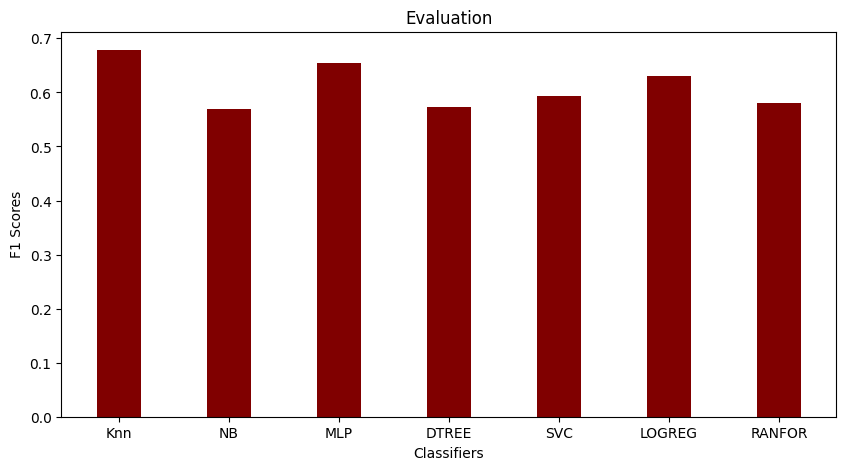

In [39]:
 import matplotlib.pyplot as plt 
# creating the dataset
data = {'Knn':knn, 'NB':nb, 'MLP':mlp,'DTREE':dtree,'SVC':svc,'LOGREG':logreg,'RANFOR':ranfor}
algo = list(data.keys())
f1 = list(data.values())
print(max(f1)) 
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(algo, f1, color ='maroon',
        width = 0.4)
 
plt.xlabel("Classifiers")
plt.ylabel("F1 Scores")
plt.title("Evaluation")
plt.show()


Παρατηρούμε πως ο ταξινομητής KNeighborsClassifier(metric='euclidean', n_neighbors=7) έχει με διαφορά το καλύτερο αποτέλεσμα.

### 7. Προετοιμασία αρχείου για τη δεύτερη υποβολή στο kaggle

7.α. Χρησιμοποιήστε **ΜΟΝΟ** το μοντέλο σας με την καλύτερη επίδοση για να κάνετε προβλέψεις χρησιμοποιώντας το δοθέν σύνολο εκπαίδευσης (test set)

In [37]:
test = pd.read_csv('test.csv')
test.drop(['id','Date'], axis=1, inplace=True)
test = preprocessor.fit_transform(test)
y_predstest = best_modelK.predict(test)


        id  RainTomorrow
0        1             0
1        2             0
2        3             0
3        4             0
4        5             0
...    ...           ...
9674  9675             0
9675  9676             0
9676  9677             0
9677  9678             0
9678  9679             0

[9679 rows x 2 columns]


7.β. Αποθηκεύστε τις προβλέψεις από το καλύτερο μοντέλο σας σε ένα csv αρχείο. To csv αρχείο θα πρέπει να είναι περιέχει 2 στήλες: η πρώτη στήλη να περιέχει την στήλη id του test set file και η δεύτερη στήλη τις αντίστοιχες προβλέψεις που έκανε το καλύτερα εκπαιδευμένο μοντέλο σας (βήμα 7α).

In [40]:
my_submission =pd.DataFrame()
my_submission.insert(0,'id',range(1,len(y_predstest)+1))

y_predstest=[int(x) for x in y_predstest]
my_submission.insert(1,'RainTomorrow', y_predstest)
print(my_submission)

my_submission.to_csv("submission.csv", index=False)

        id  RainTomorrow
0        1             0
1        2             0
2        3             0
3        4             0
4        5             0
...    ...           ...
9674  9675             0
9675  9676             0
9676  9677             0
9677  9678             0
9678  9679             0

[9679 rows x 2 columns]
